## Assignment-03 First Step of Machine Learning: Model and Evaluation

机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [20]:
# you code here
!pip install sklearn
!pip install icecream
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [59]:
# Get RM data, and regard RM as independent variable
dataset = load_boston()
#dataset
x,y=dataset['data'],dataset['target']
dataset.feature_names
dataset['DESCR']
X_rm = x[:,5]

In [23]:
y = np.array(y)

In [29]:
# Ensure K and B in linaer regression
import numpy as np
from icecream import ic
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_rm.reshape(-1, 1), y)
ic(reg.score(X_rm.reshape(-1, 1), y))
ic(reg.coef_)
ic(reg.intercept_)
def regression_fn(x): 
    return reg.coef_ * x + reg.intercept_

ic| reg.score(X_rm.reshape(-1, 1), y): 0.4835254559913343
ic| reg.coef_: array([9.10210898])
ic| reg.intercept_: -34.67062077643857


ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in an interpreter (e.g. python -i), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?


array([38.14625107])

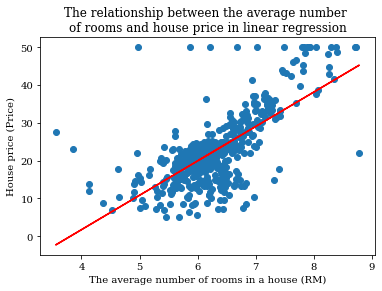

In [34]:
# Regress the price function use best parameters and plot it
plt.xlabel('The average number of rooms in a house (RM)')
plt.ylabel('House price (Price)')
plt.title('The relationship between the average number \nof rooms and house price in linear regression')
plt.scatter(X_rm, y)
plt.plot(X_rm, regression_fn(X_rm), color='red')
ic(reg.predict([[8]]))

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [8]:
# you code here
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
dataset = load_boston()
#dataset
x,y=dataset['data'],dataset['target']
dataset.feature_names
dataset['DESCR']
X_rm = x[:,5]

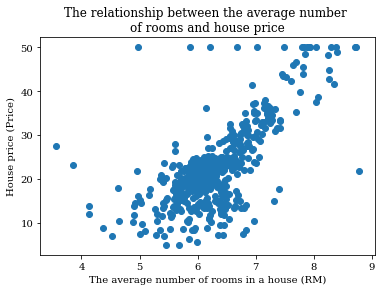

The prediction result of house price when RM is 8: 17.34


In [19]:
from scipy.spatial.distance import cosine
def knn_model(x, y):
    # 直接存储 X,y 即可
    return [(xi, yi) for xi, yi in zip(x, y)]
def distance(x1, x2):
    return cosine(x1, x2)
def predict(model,x, k=5):
    # 在predicate的时候，需要做大量的计算
    most_similars = sorted(model, key=lambda xi: distance(xi[0], x))[:k]
    y_hats=[_y for x,_y in most_similars]
    return np.mean(y_hats)
# Data distribution
plt.xlabel('The average number of rooms in a house (RM)')
plt.ylabel('House price (Price)')
plt.title('The relationship between the average number \nof rooms and house price')
plt.scatter(X_rm,y)
plt.show()
print("The prediction result of house price when RM is 8.7: "+str(predict(knn_model(X_rm, y),8.7)))

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

$$ Entropy = -\sum_i^n Pr(x_i) log(Pr(x_i)) $$

实现了信息熵 (1' )

In [61]:
from collections import Counter
def entropy(elements):
    '''Group chaos'''
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    #ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [62]:
# you code here
from sklearn.datasets import load_boston
from icecream import ic
from collections import Counter
import pandas as pd

In [66]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
#     'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [73]:
dataset = pd.DataFrame.from_dict(mock_data)
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


实现了最优先特征点的选择(5')

In [74]:
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_spliter_1)
            # split by the current feature and one value
            
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_spliter_2)
            
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [75]:
find_the_optimal_spilter(training_data=dataset, target='bought')

ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_spliter_1: [0, 0, 1]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [1, 1, 1, 0]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [1, 1, 1, 0]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [0, 0, 1]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_spliter_1: [1, 1]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| entrop

spliter is: ('income', '+10')
the min entropy is: 0.6730116670092565


('income', '+10')

实现了持续的特征选则(6')

In [90]:
in_positive10=dataset[dataset['income']=='+10']

In [91]:
in_positive10

,gender,income,family_number,bought
0,F,+10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [92]:
in_negative10=dataset[dataset['income']!='+10']
in_negative10

,gender,income,family_number,bought
1,F,-10,1,1
6,M,-10,2,1


In [93]:
find_the_optimal_spilter(training_data=in_positive10, target='bought')

ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 0, 0, 0]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [1]
ic| entropy_2: -0.0
ic| entropy_v: 0.5623351446188083
ic| sub_spliter_1: [1]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 0, 0, 0]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 0.5623351446188083
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_spliter_1: [0, 0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 0.6365141682948128
ic| sub_spliter_1: [1, 1, 0]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [0, 0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6365141682948128
ic| f: 'income'
ic| values: {'+10'}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: []
ic| entropy_2: 0
ic| entropy_v: 0.6730116670092565


spliter is: ('family_number', 2)
the min entropy is: 0.5623351446188083


('family_number', 2)

In [94]:
fm_n_2=in_positive10[in_positive10['family_number']==2]
fm_n_2

,gender,income,family_number,bought
2,F,+10,2,1


In [96]:
fm_n_1=in_positive10[in_positive10['family_number']!=2]
fm_n_1

,gender,income,family_number,bought
0,F,+10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [97]:
find_the_optimal_spilter(training_data=fm_n_1, target='bought')

ic| f: 'family_number'
ic| values: {1}
ic| sub_spliter_1: [1, 0, 0, 0]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: []
ic| entropy_2: 0
ic| entropy_v: 0.5623351446188083
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_spliter_1: [0, 0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 0]
ic| entropy_2: 0.6931471805599453
ic| entropy_v: 0.6931471805599453
ic| sub_spliter_1: [1, 0]
ic| entropy_1: 0.6931471805599453
ic| sub_spliter_2: [0, 0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6931471805599453
ic| f: 'income'
ic| values: {'+10'}
ic| sub_spliter_1: [1, 0, 0, 0]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: []
ic| entropy_2: 0
ic| entropy_v: 0.5623351446188083


spliter is: ('income', '+10')
the min entropy is: 0.5623351446188083


('income', '+10')

In [98]:
in_positive10=fm_n_1[fm_n_1['income']=="+10"]
in_positive10

,gender,income,family_number,bought
0,F,+10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

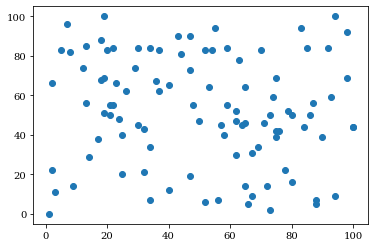

In [147]:
import random
from sklearn.cluster import KMeans
X1 = [random.randint(0,100) for _ in range(100)]
X2 = [random.randint(0,100) for _ in range(100)]
plt.scatter(X1, X2)

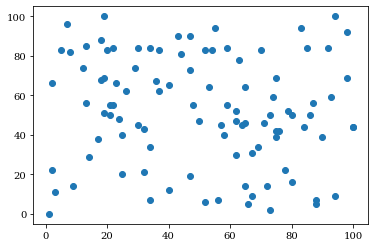

In [148]:
plt.scatter(X1, X2)

In [151]:
tranning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]
cluster = KMeans(n_clusters=8, max_iter=500)
cluster.fit(tranning_data)
cluster.cluster_centers_
cluster.labels_

array([2, 7, 7, 7, 1, 0, 7, 0, 1, 7, 7, 7, 7, 6, 0, 6, 5, 6, 3, 3, 5, 3,
       7, 3, 3, 7, 3, 5, 5, 0, 6, 2, 0, 7, 7, 2, 2, 5, 7, 1, 0, 4, 3, 2,
       2, 2, 0, 4, 3, 5, 6, 2, 7, 3, 6, 1, 3, 2, 4, 3, 3, 0, 3, 1, 6, 0,
       4, 4, 5, 3, 1, 3, 1, 1, 0, 4, 6, 5, 5, 5, 1, 0, 6, 2, 2, 3, 5, 0,
       3, 1, 4, 2, 3, 2, 3, 2, 6, 0, 5, 7])

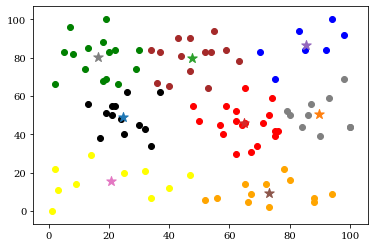

In [153]:
from collections import defaultdict
centers = defaultdict(list)
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)

color = ['brown', 'green', 'grey', 'black', 'yellow', 'orange','red','blue']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100,marker='*')

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans: 模型是现实世界的抽象。
所谓模型就是对实际事物的一个抽象，但事实上，实际事物的影响因素是多种多样的，一个数学模型只可能考虑其中的一部分影响因素而不是全部，但事物的发展有时却的确由不显著因素影响。从这个意义上讲数学模型与事物实际的规律还是有很大差异的，即所谓错误的。
但是，由于数学模型往往抓住的和考虑的是对事物发展影响最为显著的一些因素，所以，数学模型抓住了事物发展的主要矛盾和主要规律，从这个意义上讲，数学模型还是有用的。

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:1.过拟合:过分依赖训练数据 欠拟合:未能学习训练数据中的关系
2. overfitting产生原因：
1.训练集和测试集特征分布不一致2.数据噪声太大3.数据量太小4.特征量太多5.模型太过复杂
3. underfitting产生原因：
1.模型复杂度过低 2.特征量过少

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:1.precision是针对我们预测结果而言的，它表示的是预测为正的样本中有多少是真正的正样本。
2.recall召回率是针对我们原来的样本而言的，它表示的是样本中的正例有多少被预测正确了。
3.AUC
ROC(receiver operating characteristic curve)是一条曲线，其横轴表示的是FPR(False Positive Rate)——错误地预测为正例的概率，纵轴表示的是TPR(True Positive Rate)——正确地预测为正例地概率
AUC(area under curve)是一个数值——曲线与坐标轴围成的面积，ROC-AUC即表示的是ROC曲线与坐标轴围成的面积。
4.F1-score 是基于召回率和精确率计算的：F1score=2∗Precision∗Recall/(Precision+Recall) 
当对精准率或者召回率没有特殊要求时，评价一个模型的优劣就需要同时考虑精准率与召回率，此时可以考虑使用F1-score。F1-score实际上是precision与recall的调和平均值


<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:在传统编程中，你需要对程序的行为进行硬编码。在机器学习中，你将大量内容留给机器去学习数据。

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.
正确。因为数学模型与事物实际的规律还是有很大差异的，即所谓错误的。所以正确定义的评价标准才能能确保数学模型抓住了事物发展的主要矛盾和主要规律。

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [154]:
# you code here
import numpy as np
from collections import Counter
from sklearn.datasets import load_boston
from icecream import ic
from collections import Counter
import pandas as pd
#实现了信息熵
def entropy(elements):
    '''Group chaos'''
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    #ic(probs)
    return - sum(p * np.log(p) for p in probs)

mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
dataset = pd.DataFrame.from_dict(mock_data)
# ic(dataset)

In [160]:
"""
函数说明:选择最优特征
"""
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        values = set(training_data[f])
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            # split by the current feature and one value
            entropy_1 = entropy(sub_spliter_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            entropy_2 = entropy(sub_spliter_2)
            
            entropy_v = entropy_1 + entropy_2
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    return spliter

In [161]:
"""
函数说明:按照给定特征划分数据集
Parameters:
    dataset - 待划分的数据集
    feature - 划分数据集的特征
    value - 需要返回的特征的值
"""
def spilt_dataset(dataset, feature, value):
    condition = (dataset[feature]==value)
    return dataset[condition].drop([feature],axis=1)

In [162]:
"""
函数说明:递归构建决策树
"""
def decision_tree_model(training_data: pd.DataFrame, target: str):
    target_value_counter = training_data[target].value_counts()
    if target_value_counter.iloc[0] == training_data[target].shape[0]:#如果类别完全相同则停止继续划分
        return 1
    if len(training_data.columns.tolist())==1:#遍历完所有特征时返回预测为“购买（1）”的概率
        return target_value_counter.loc[1]/training_data[target].shape[0]    
    optimal_feat,feat_value= find_the_optimal_spilter(training_data,target)#得到最优特征以及对应的value
    my_tree = {optimal_feat:{}} #根据最优特征的标签生成树
    for v in training_data[optimal_feat].unique():
        subtree= spilt_dataset(training_data,optimal_feat,v)
        my_tree[optimal_feat][v] = decision_tree_model(subtree,target)
    return my_tree

In [163]:
def predict(gender, income, family_number):
    decision_tree=decision_tree_model(dataset,'bought')
    dict_test={'gender':gender,'income':income,'family_number':family_number}

    feature1=list(decision_tree.keys())[0]
    sec_dict=decision_tree[feature1]# {'+10': {'family_number': {1: {'gender': {'F': 0.5, 'M': 1}}, 2: 1}}, '-10': 1}
    fir_node_values=list(sec_dict.keys())#['+10', '-10']
    if dict_test[feature1]==fir_node_values[1]:
        print("The probability of 'bought': "+str(sec_dict[fir_node_values[1]]))
    else:
        third_dict=sec_dict[fir_node_values[0]]
        feature2= list(third_dict.keys())[0]
        fourth_dict=third_dict[feature2]#{1: {'gender': {'F': 0.5, 'M': 1}}, 2: 1}}
        sec_node_values=list(fourth_dict.keys())#[1,2]
        if dict_test[feature2]==sec_node_values[1]:
            print("The probability of 'bought': "+str(fourth_dict[sec_node_values[1]]))
        else:
            firth_dict=fourth_dict[sec_node_values[0]]
            feature3= list(firth_dict.keys())[0]
            sixth_dict=firth_dict[feature3]
            third_node_values=list(sixth_dict.keys())#['F', 'M']
            if dict_test[feature3]==third_node_values[1]:
                print("The probability of 'bought': "+str(sixth_dict[third_node_values[1]]))
            else:
                print("The probability of 'bought': "+str(sixth_dict[third_node_values[0]]))

In [164]:
predict('F','+10',1)

The probability of 'bought': 0.5


<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [177]:
# you code here
from sklearn.datasets import load_boston
import random
import numpy as np
dataset = load_boston()

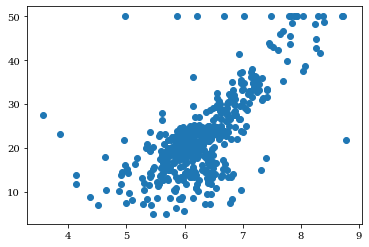

In [169]:
x,y=dataset['data'],dataset['target']
X_rm = x[:,5]
# plot the RM with respect to y
plt.scatter(X_rm,y)

### Gradient descent
### Assume that the target funciton is a linear function
$$ y = k*rm + b$$

In [170]:
#define target function
def price(rm, k, b):
    return k * rm + b

### Define mean square loss
$$ loss = \frac{1}{n} \sum|(y_i - \hat{y_i})|$$
$$ loss = \frac{1}{n} \sum|(y_i - (kx_i + b_i))| $$

In [171]:
# define loss function 
def loss(y,y_hat):
    return sum(np.abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

### Define partial derivatives
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{1}{n}\sum|(y_i - \hat{y_i})|x_i$$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{1}{n}\sum|(y_i - \hat{y_i})|$$

In [172]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += np.abs(y_i-y_hat_i) * x_i
    return -1/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += np.abs(y_i-y_hat_i)
    return -1 / n * gradient

Iteration 0, the loss is 541.5201106333976, parameters k is -83.6443787214592 and b is 6.687034512270969
Iteration 1, the loss is 519.303190322949, parameters k is -80.19542706192608 and b is 7.228554622904367
Iteration 2, the loss is 497.9966597663219, parameters k is -76.88779990574038 and b is 7.747857813227316
Iteration 3, the loss is 477.56321364855836, parameters k is -73.7157061562426 and b is 8.245854472993638
Iteration 4, the loss is 457.9670753258162, parameters k is -70.67359202028412 and b is 8.723417686642197
Iteration 5, the loss is 439.17393418455725, parameters k is -67.75613128416975 and b is 9.181384761968014
Iteration 6, the loss is 421.15088556758184, parameters k is -64.95821598806603 and b is 9.620558696152571
Iteration 7, the loss is 403.8663731617316, parameters k is -62.274947482546985 and b is 10.041709581720152
Iteration 8, the loss is 387.29013374639015, parameters k is -59.70162785161862 and b is 10.445575954881884
Iteration 9, the loss is 371.3931442060411

Iteration 104, the loss is 7.934647896745668, parameters k is -0.4793675990382025 and b is 19.69291487880779
Iteration 105, the loss is 7.751832960120147, parameters k is -0.4258418528858397 and b is 19.700849526704538
Iteration 106, the loss is 7.582614722560026, parameters k is -0.3735472712802978 and b is 19.70860135966466
Iteration 107, the loss is 7.427467869852198, parameters k is -0.3223997792698089 and b is 19.716183974387217
Iteration 108, the loss is 7.280107311970447, parameters k is -0.27231349627412316 and b is 19.72361144225707
Iteration 109, the loss is 7.143415327310211, parameters k is -0.22323842069663918 and b is 19.73089154956904
Iteration 110, the loss is 7.019021016574351, parameters k is -0.17510620277592492 and b is 19.73803496489635
Iteration 111, the loss is 6.906607921348495, parameters k is -0.12784047266194126 and b is 19.745053985912925
Iteration 112, the loss is 6.805259152528819, parameters k is -0.08136687725542648 and b is 19.751960593834273
Iteration 

Iteration 256, the loss is 612.7216479194117, parameters k is 95.53557083329366 and b is 34.84832056932326
Iteration 257, the loss is 637.8024427848695, parameters k is 99.42888772485091 and b is 35.46104221724268
Iteration 258, the loss is 663.9109806072387, parameters k is 103.48174646088908 and b is 36.098844660027545
Iteration 259, the loss is 691.0893755189969, parameters k is 107.70068463564009 and b is 36.762755640634786
Iteration 260, the loss is 719.3814673761049, parameters k is 112.0925077363024 and b is 37.453845016153785
Iteration 261, the loss is 748.8328924734923, parameters k is 116.66430012057178 and b is 38.17322648352989
Iteration 262, the loss is 779.4911571582884, parameters k is 121.4234364440016 and b is 38.92205937600338
Iteration 263, the loss is 811.4057144595021, parameters k is 126.37759355562548 and b is 39.70155053316167
Iteration 264, the loss is 844.6280438577973, parameters k is 131.53476288103053 and b is 40.512956247621176
Iteration 265, the loss is 8

Iteration 356, the loss is 33957.223615321556, parameters k is 5271.76433286176 and b is 848.6450133280308
Iteration 357, the loss is 35348.67207117719, parameters k is 5487.765956595416 and b is 882.6022369433524
Iteration 358, the loss is 36797.138328890826, parameters k is 5712.61874810966 and b is 917.9509090145295
Iteration 359, the loss is 38304.958824090696, parameters k is 5946.6854043707635 and b is 954.7480473434204
Iteration 360, the loss is 39874.56573323105, parameters k is 6190.343484687748 and b is 993.0530061675111
Iteration 361, the loss is 41508.490896792704, parameters k is 6443.9860197310845 and b is 1032.9275719007421
Iteration 362, the loss is 43209.36990324597, parameters k is 6708.022145507323 and b is 1074.4360627975348
Iteration 363, the loss is 44979.94634036321, parameters k is 6982.877763312298 and b is 1117.6454327007807
Iteration 364, the loss is 46823.076220738585, parameters k is 7268.996226727434 and b is 1162.625379041144
Iteration 365, the loss is 48

Iteration 448, the loss is 1366217.564329593, parameters k is 212085.40624700132 and b is 33360.85998054048
Iteration 449, the loss is 1422201.445728331, parameters k is 220776.07311289434 and b is 34727.07754487007
Iteration 450, the loss is 1480479.3954851679, parameters k is 229822.8600549531 and b is 36149.2789905984
Iteration 451, the loss is 1541145.4183296915, parameters k is 239240.35991272575 and b is 37629.75838608357
Iteration 452, the loss is 1604297.3710515935, parameters k is 249043.7635009388 and b is 39170.90380441326
Iteration 453, the loss is 1670037.120347686, parameters k is 259248.884112906 and b is 40775.201175464856
Iteration 454, the loss is 1738470.7071370806, parameters k is 269872.18302802084 and b is 42445.23829581254
Iteration 455, the loss is 1809708.5176095488, parameters k is 280930.7960644772 and b is 44183.70900294962
Iteration 456, the loss is 1883865.4612829809, parameters k is 292442.5612200485 and b is 45993.41752055917
Iteration 457, the loss is 1

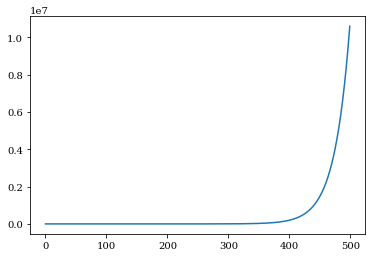

In [176]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 500 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b
plt.plot(list(range(iteration_num)),losses)

### 函数最后不趋近于某个常数，所以不能收敛

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)